## 3.5 Classifying newswires 新闻多分类
上一节中，我们介绍了如何用密集连接的神经网络将向量输入划分为两个互斥的类别，但如果类别不止两个，要怎么做？

本节你会构建一个网络，将路透社新闻划分为46 个互斥的主题。因为有多个类别，所以这是多分类（multiclass classification）问题的一个例子。因为每个数据点只能划分到一个类别，所以更具体地说，这是单标签、多分类（single-label, multiclass classification）问题的一个例子。如果每个数据点可以划分到多个类别（主题），那它就是一个多标签、多分类（multilabel,multiclass classification）问题。

### 获取数据集
本节使用路透社数据集，它包含许多短新闻及其对应的主题，由路透社在1986 年发布。它是一个简单的、广泛使用的文本分类数据集。它包括46 个不同的主题：某些主题的样本更多，但训练集中每个主题都有至少10 个样本。数据集本身也是Keras内置的一部分

In [2]:
from keras.datasets import reuters
# 与IMDB 数据集一样，参数num_words=10000 将数据限定为前10 000 个最常出现的单词。
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

D:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# 8982 个训练样本和2246 个测试样本
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
# 与IMDB 评论一样，每个样本都是一个整数列表（表示单词索引）。
train_data[6]

[1,
 56,
 5539,
 925,
 149,
 8,
 16,
 23,
 931,
 3875,
 25,
 116,
 5,
 165,
 15,
 10,
 67,
 13,
 12,
 12,
 11,
 5311,
 400,
 81,
 79,
 457,
 145,
 22,
 331,
 28,
 3026,
 331,
 61,
 3609,
 2097,
 5311,
 79,
 64,
 85,
 1863,
 84,
 22,
 44,
 6206,
 2275,
 79,
 296,
 1384,
 157,
 5539,
 8,
 16,
 23,
 3875,
 4,
 116,
 6,
 837,
 5311,
 6,
 3834,
 31,
 248,
 1032,
 8757,
 4,
 1618,
 5,
 37,
 38,
 1639,
 27,
 358,
 37,
 38,
 4716,
 9,
 6,
 9474,
 4,
 316,
 9,
 662,
 5,
 4,
 765,
 5,
 291,
 58,
 60,
 2660,
 1067,
 136,
 4,
 384,
 292,
 270,
 120,
 17,
 12]

In [6]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

### 编码数据
可以使用与上一个例子相同的代码将数据向量化

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

将标签向量化有两种方法：你可以将标签列表转换为整数张量，或者使用one-hot 编码。one-hot 编码是分类数据广泛使用的一种格式，也叫分类编码（categorical encoding）。6.1 节给出了one-hot 编码的详细解释。在这个例子中，标签的one-hot 编码就是将每个标签表示为全零向量，只有标签索引对应的元素为1。其代码实现如下。

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels),dimension))
    for i ,label in enumerate(labels):
        results[i,label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)  # 将训练标签向量化
one_hot_test_labels = to_one_hot(test_labels)    # 将测试标签向量化

In [9]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [10]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
one_hot_train_labels.shape

(8982, 46)

注意，Keras 内置方法可以实现这个操作，你在MNIST 例子中已经见过这种方法。            

In [12]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 构建网络
这个主题分类问题与前面的电影评论分类问题类似，两个例子都是试图对简短的文本片段进行分类。但这个问题有一个新的约束条件：输出类别的数量从2 个变为46 个。输出空间的维度要大得多。

对于前面用过的Dense 层的堆叠，每层只能访问上一层输出的信息。如果某一层丢失了与分类问题相关的一些信息，那么这些信息无法被后面的层找回，也就是说，每一层都可能成为信息瓶颈。上一个例子使用了16 维的中间层，但对这个例子来说16 维空间可能太小了，无法学会区分46 个不同的类别。这种维度较小的层可能成为信息瓶颈，永久地丢失相关信息。

出于这个原因，下面将使用维度更大的层，包含64 个单元。

In [16]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

关于这个架构还应该注意另外两点。

 网络的最后一层是大小为 46 的 Dense 层。这意味着，对于每个输入样本，网络都会输
出一个46 维向量。这个向量的每个元素（即每个维度）代表不同的输出类别。

 最后一层使用了 softmax 激活。你在 MNIST 例子中见过这种用法。网络将输出在 46
个不同输出类别上的概率分布——对于每一个输入样本，网络都会输出一个46 维向量，
其中output[i] 是样本属于第i 个类别的概率。46 个概率的总和为1。

对于这个例子，最好的损失函数是categorical_crossentropy（分类交叉熵）。它用于衡量两个概率分布之间的距离，这里两个概率分布分别是网络输出的概率分布和标签的真实分布。通过将这两个分布的距离最小化，训练网络可使输出结果尽可能接近真实标签。

In [17]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

### 验证你的方法
我们在训练数据中留出1000 个样本作为验证集

留出验证集

In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

现在开始训练网络，共20 个轮次

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 321us/step - loss: 2.5526 - acc: 0.5246 - val_loss: 1.7375 - val_acc: 0.6370
Epoch 2/20
7982/7982 [==============================] - 2s 188us/step - loss: 1.4267 - acc: 0.7095 - val_loss: 1.3158 - val_acc: 0.7210
Epoch 3/20
7982/7982 [==============================] - 1s 183us/step - loss: 1.0580 - acc: 0.7806 - val_loss: 1.1526 - val_acc: 0.7470
Epoch 4/20
7982/7982 [==============================] - 1s 183us/step - loss: 0.8319 - acc: 0.8255 - val_loss: 1.0610 - val_acc: 0.7640
Epoch 5/20
7982/7982 [==============================] - 1s 182us/step - loss: 0.6625 - acc: 0.8624 - val_loss: 0.9790 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 1s 185us/step - loss: 0.5289 - acc: 0.8903 - val_loss: 0.9439 - val_acc: 0.7890
Epoch 7/20
7982/7982 [==============================] - 2s 205us/step - loss: 0.4269 - acc: 0.9095 - val_loss: 0.9380 - val_acc: 0.7970


绘制训练损失和验证损失

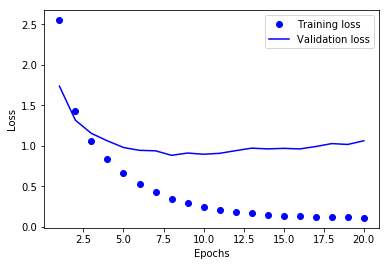

In [21]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo', label='Training loss')
plt.plot(epochs,val_loss,'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

绘制训练精度和验证精度

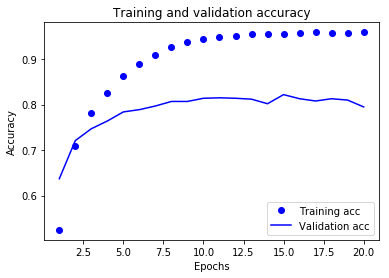

In [22]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

网络在训练9 轮后开始过拟合。我们从头开始训练一个新网络，共9 个轮次，然后在测试集上评估模型

从头开始重新训练一个模型

In [23]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 216us/step - loss: 2.5396 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 182us/step - loss: 1.3712 - acc: 0.7117 - val_loss: 1.2746 - val_acc: 0.7200
Epoch 3/9
7982/7982 [==============================] - 1s 179us/step - loss: 1.0130 - acc: 0.7781 - val_loss: 1.1314 - val_acc: 0.7510
Epoch 4/9
7982/7982 [==============================] - 1s 181us/step - loss: 0.7975 - acc: 0.8254 - val_loss: 1.0534 - val_acc: 0.7580
Epoch 5/9
7982/7982 [==============================] - 1s 177us/step - loss: 0.6390 - acc: 0.8634 - val_loss: 0.9762 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 183us/step - loss: 0.5111 - acc: 0.8925 - val_loss: 0.9089 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 179us/step - loss: 0.4107 - acc: 0.9147 - val_loss: 0.8905 - val_acc: 0.8200
Epoch 8

In [24]:
results = model.evaluate(x_test,one_hot_test_labels)
results

2246/2246 [==============================] - 1s 281us/step


[1.0248980018992777, 0.7764915405695499]

在新数据上生成预测结果

In [25]:
predictions = model.predict(x_test)

In [26]:
predictions

array([[1.0033132e-05, 8.5511281e-05, 2.6822054e-05, ..., 3.2219876e-05,
        6.5403738e-06, 9.7547336e-06],
       [8.6128834e-04, 1.9036099e-02, 3.8210184e-03, ..., 5.9888174e-04,
        1.2981832e-05, 2.9760136e-04],
       [1.7774410e-03, 7.6527029e-01, 2.9769260e-03, ..., 1.5738426e-04,
        1.9118023e-03, 2.1999619e-04],
       ...,
       [1.1235362e-05, 2.1618542e-04, 4.0543520e-05, ..., 9.1064512e-06,
        1.1658003e-04, 1.1625566e-05],
       [1.3548984e-03, 1.2299884e-01, 3.5364276e-03, ..., 6.1818131e-04,
        7.5275544e-04, 3.8147951e-04],
       [8.9320680e-04, 5.3720850e-01, 2.0211563e-03, ..., 5.3426706e-05,
        4.8396137e-04, 2.0715705e-04]], dtype=float32)

In [27]:
# predictions 中的每个元素都是长度为46 的向量。
predictions[0].shape

(46,)

In [28]:
# 这个向量的所有元素总和为1。
np.sum(predictions[0])

1.0000001

In [29]:
# 最大的元素就是预测类别，即概率最大的类别。
np.argmax(predictions[0])

3

#### 处理标签和损失的另一种方法
前面提到了另一种编码标签的方法，就是将其转换为整数张量，如下所示。

y_train = np.array(train_labels)

y_test = np.array(test_labels)

对于这种编码方法，唯一需要改变的是损失函数的选择。对于代码清单3-21 使用的损失函数categorical_crossentropy，标签应该遵循分类编码。对于整数标签，你应该使用sparse_categorical_crossentropy。

In [30]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

这个新的损失函数在数学上与categorical_crossentropy 完全相同，二者只是接口不同

#### 中间层维度足够大的重要性

前面提到，最终输出是46 维的，因此中间层的隐藏单元个数不应该比46 小太多。现在来看一下，如果中间层的维度远远小于46（比如4 维），造成了信息瓶颈，那么会发生什么？

##### 具有信息瓶颈的模型

In [31]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 271us/step - loss: 3.5511 - acc: 0.1936 - val_loss: 3.3091 - val_acc: 0.2380
Epoch 2/20
7982/7982 [==============================] - 1s 184us/step - loss: 3.1229 - acc: 0.2601 - val_loss: 2.9541 - val_acc: 0.2570
Epoch 3/20
7982/7982 [==============================] - 2s 189us/step - loss: 2.7377 - acc: 0.2790 - val_loss: 2.6204 - val_acc: 0.2830
Epoch 4/20
7982/7982 [==============================] - 2s 189us/step - loss: 2.3876 - acc: 0.3076 - val_loss: 2.3089 - val_acc: 0.3960
Epoch 5/20
7982/7982 [==============================] - 2s 189us/step - loss: 2.0411 - acc: 0.5801 - val_loss: 1.9826 - val_acc: 0.6090
Epoch 6/20
7982/7982 [==============================] - 2s 192us/step - loss: 1.7230 - acc: 0.6427 - val_loss: 1.7554 - val_acc: 0.6170
Epoch 7/20
7982/7982 [==============================] - 2s 189us/step - loss: 1.5039 - acc: 0.6550 - val_loss: 1.6185 - val_acc: 0.6300


现在网络的验证精度最大约为68.5%，比前面下降了8%。导致这一下降的主要原因在于，你试图将大量信息（这些信息足够恢复46 个类别的分割超平面）压缩到维度很小的中间空间。网络能够将大部分必要信息塞入这个四维表示中，但并不是全部信息。

#### 进一步的实验
尝试使用更多或更少的隐藏单元，比如 32 个、128 个等。

前面使用了两个隐藏层，现在尝试使用一个或三个隐藏层。

In [32]:
# 更少的隐藏单元
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 220us/step - loss: 3.0507 - acc: 0.5104 - val_loss: 2.2591 - val_acc: 0.6520
Epoch 2/20
7982/7982 [==============================] - 2s 189us/step - loss: 1.8738 - acc: 0.6884 - val_loss: 1.6095 - val_acc: 0.6780
Epoch 3/20
7982/7982 [==============================] - 2s 188us/step - loss: 1.3692 - acc: 0.7310 - val_loss: 1.3480 - val_acc: 0.7200
Epoch 4/20
7982/7982 [==============================] - 1s 188us/step - loss: 1.0958 - acc: 0.7707 - val_loss: 1.2083 - val_acc: 0.7420
Epoch 5/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.9167 - acc: 0.8088 - val_loss: 1.1178 - val_acc: 0.7630
Epoch 6/20
7982/7982 [==============================] - 2s 190us/step - loss: 0.7712 - acc: 0.8404 - val_loss: 1.0529 - val_acc: 0.7880
Epoch 7/20
7982/7982 [==============================] - 2s 200us/step - loss: 0.6530 - acc: 0.8648 - val_loss: 0.9998 - val_acc: 0.8000


精度提高到80%

In [33]:
# 更多的隐藏单元
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 230us/step - loss: 2.5566 - acc: 0.4872 - val_loss: 1.6922 - val_acc: 0.6300
Epoch 2/20
7982/7982 [==============================] - 2s 190us/step - loss: 1.3902 - acc: 0.7012 - val_loss: 1.2726 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 2s 194us/step - loss: 1.0288 - acc: 0.7781 - val_loss: 1.1113 - val_acc: 0.7670
Epoch 4/20
7982/7982 [==============================] - 2s 211us/step - loss: 0.7989 - acc: 0.8302 - val_loss: 1.0009 - val_acc: 0.7970
Epoch 5/20
7982/7982 [==============================] - 2s 189us/step - loss: 0.6272 - acc: 0.8673 - val_loss: 0.9718 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 2s 194us/step - loss: 0.4962 - acc: 0.8934 - val_loss: 0.8835 - val_acc: 0.8130
Epoch 7/20
7982/7982 [==============================] - 2s 194us/step - loss: 0.3890 - acc: 0.9193 - val_loss: 0.8995 - val_acc: 0.8030


当模型训练到第9轮的时候，很明显的出现了过拟合

下面尝试更多的隐藏层

In [34]:
# 更多的隐藏单元
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 234us/step - loss: 3.0277 - acc: 0.4308 - val_loss: 2.0300 - val_acc: 0.6030
Epoch 2/20
7982/7982 [==============================] - 2s 188us/step - loss: 1.6507 - acc: 0.6724 - val_loss: 1.4828 - val_acc: 0.6870
Epoch 3/20
7982/7982 [==============================] - 2s 189us/step - loss: 1.2066 - acc: 0.7373 - val_loss: 1.2839 - val_acc: 0.7160
Epoch 4/20
7982/7982 [==============================] - 2s 191us/step - loss: 0.9648 - acc: 0.7819 - val_loss: 1.1448 - val_acc: 0.7470
Epoch 5/20
7982/7982 [==============================] - 2s 204us/step - loss: 0.7819 - acc: 0.8156 - val_loss: 1.0629 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 2s 201us/step - loss: 0.6399 - acc: 0.8518 - val_loss: 1.0706 - val_acc: 0.7660
Epoch 7/20
7982/7982 [==============================] - 2s 190us/step - loss: 0.5194 - acc: 0.8852 - val_loss: 1.0685 - val_acc: 0.7670


更多的隐藏层并不能够提高模型精度，同样是训练到第9轮的时候出现了过拟合，后续可以把训练轮数控制在10轮以内，修改其他参数或使用其他算法

### 小结
下面是你应该从这个例子中学到的要点。

 如果要对 N个类别的数据点进行分类，网络的最后一层应该是大小为N的Dense层。

 对于单标签、多分类问题，网络的最后一层应该使用softmax 激活，这样可以输出在N个输出类别上的概率分布。

 这种问题的损失函数几乎总是应该使用分类交叉熵。它将网络输出的概率分布与目标的真实分布之间的距离最小化。

 处理多分类问题的标签有两种方法。

     通过分类编码（也叫 one-hot 编码）对标签进行编码，然后使用 categorical_crossentropy 作为损失函数。
     将标签编码为整数，然后使用 sparse_categorical_crossentropy损失函数。
 如果你需要将数据划分到许多类别中，应该避免使用太小的中间层，以免在网络中造成信息瓶颈。